In [1]:
%matplotlib inline

In [2]:
import gc
import pathlib
import sys

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train_filtered.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"
src_dir_path = root_dir_path / "src"

In [5]:
sys.path.append(str(src_dir_path))

In [6]:
from constants import *

In [7]:
train = pd.read_parquet(train_path)

In [8]:
is_train = train["date"] < "2016-01-29"
is_valid = train["date"] >= "2016-01-29"
train, valid = train[is_train], train[is_valid]

In [9]:
del is_train

In [10]:
gc.collect()

60

In [11]:
X = train[features]
X_valid = valid[features]
y = train["demand"]
y_valid = valid["demand"]

In [12]:
del train
del valid

In [13]:
gc.collect()

60

In [14]:
X.shape

(43375450, 28)

In [15]:
X_valid.shape

(2652507, 28)

In [16]:
model = lgb.LGBMRegressor(importance_type="gain", learning_rate=0.05, n_estimators=1_000, random_state=0)

In [17]:
model.fit(
    X,
    y,
    categorical_feature=categorical_features,
    early_stopping_rounds=100,
    eval_metric="rmse",
    eval_set=[(X, y), (X_valid, y_valid)],
)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_id', 'dept_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2', 'item_id', 'state_id', 'store_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's rmse: 4.20915	training's l2: 17.7169	valid_1's rmse: 3.53879	valid_1's l2: 12.5231
Training until validation scores don't improve for 100 rounds
[2]	training's rmse: 4.0805	training's l2: 16.6505	valid_1's rmse: 3.42876	valid_1's l2: 11.7564
[3]	training's rmse: 3.9606	training's l2: 15.6864	valid_1's rmse: 3.32688	valid_1's l2: 11.0681
[4]	training's rmse: 3.84897	training's l2: 14.8146	valid_1's rmse: 3.23095	valid_1's l2: 10.439
[5]	training's rmse: 3.74513	training's l2: 14.026	valid_1's rmse: 3.14225	valid_1's l2: 9.87376
[6]	training's rmse: 3.64889	training's l2: 13.3144	valid_1's rmse: 3.06038	valid_1's l2: 9.36595
[7]	training's rmse: 3.55957	training's l2: 12.6706	valid_1's rmse: 2.9837	valid_1's l2: 8.90248
[8]	training's rmse: 3.47683	training's l2: 12.0883	valid_1's rmse: 2.91266	valid_1's l2: 8.48361
[9]	training's rmse: 3.40003	training's l2: 11.5602	valid_1's rmse: 2.84599	valid_1's l2: 8.09965
[10]	training's rmse: 3.32932	training's l2: 11.0844	valid_1'

[84]	training's rmse: 2.46581	training's l2: 6.08024	valid_1's rmse: 2.07863	valid_1's l2: 4.32072
[85]	training's rmse: 2.46462	training's l2: 6.07434	valid_1's rmse: 2.07837	valid_1's l2: 4.31963
[86]	training's rmse: 2.46356	training's l2: 6.06911	valid_1's rmse: 2.07822	valid_1's l2: 4.319
[87]	training's rmse: 2.46268	training's l2: 6.06478	valid_1's rmse: 2.07779	valid_1's l2: 4.31723
[88]	training's rmse: 2.4612	training's l2: 6.0575	valid_1's rmse: 2.07778	valid_1's l2: 4.31719
[89]	training's rmse: 2.46015	training's l2: 6.05233	valid_1's rmse: 2.07755	valid_1's l2: 4.3162
[90]	training's rmse: 2.45864	training's l2: 6.04491	valid_1's rmse: 2.07798	valid_1's l2: 4.31799
[91]	training's rmse: 2.45758	training's l2: 6.03971	valid_1's rmse: 2.07791	valid_1's l2: 4.31772
[92]	training's rmse: 2.45667	training's l2: 6.03521	valid_1's rmse: 2.07764	valid_1's l2: 4.31659
[93]	training's rmse: 2.45581	training's l2: 6.03099	valid_1's rmse: 2.07783	valid_1's l2: 4.31737
[94]	training's

[167]	training's rmse: 2.40677	training's l2: 5.79255	valid_1's rmse: 2.06745	valid_1's l2: 4.27435
[168]	training's rmse: 2.40632	training's l2: 5.79038	valid_1's rmse: 2.06753	valid_1's l2: 4.27467
[169]	training's rmse: 2.40598	training's l2: 5.78873	valid_1's rmse: 2.06754	valid_1's l2: 4.27471
[170]	training's rmse: 2.40553	training's l2: 5.78659	valid_1's rmse: 2.06759	valid_1's l2: 4.27495
[171]	training's rmse: 2.40501	training's l2: 5.78407	valid_1's rmse: 2.06754	valid_1's l2: 4.27473
[172]	training's rmse: 2.4046	training's l2: 5.78209	valid_1's rmse: 2.06779	valid_1's l2: 4.27576
[173]	training's rmse: 2.40408	training's l2: 5.77959	valid_1's rmse: 2.06776	valid_1's l2: 4.27562
[174]	training's rmse: 2.40353	training's l2: 5.77696	valid_1's rmse: 2.06767	valid_1's l2: 4.27526
[175]	training's rmse: 2.40313	training's l2: 5.77501	valid_1's rmse: 2.06766	valid_1's l2: 4.27522
[176]	training's rmse: 2.40274	training's l2: 5.77317	valid_1's rmse: 2.06765	valid_1's l2: 4.2752
[1

[250]	training's rmse: 2.37856	training's l2: 5.65756	valid_1's rmse: 2.06465	valid_1's l2: 4.26277
[251]	training's rmse: 2.37837	training's l2: 5.65663	valid_1's rmse: 2.06458	valid_1's l2: 4.26248
[252]	training's rmse: 2.37817	training's l2: 5.65569	valid_1's rmse: 2.0646	valid_1's l2: 4.26255
[253]	training's rmse: 2.37786	training's l2: 5.65423	valid_1's rmse: 2.06457	valid_1's l2: 4.26245
[254]	training's rmse: 2.37747	training's l2: 5.65238	valid_1's rmse: 2.06458	valid_1's l2: 4.26248
[255]	training's rmse: 2.37725	training's l2: 5.65131	valid_1's rmse: 2.06473	valid_1's l2: 4.26313
[256]	training's rmse: 2.37697	training's l2: 5.65	valid_1's rmse: 2.06474	valid_1's l2: 4.26316
[257]	training's rmse: 2.37666	training's l2: 5.64853	valid_1's rmse: 2.06472	valid_1's l2: 4.26309
[258]	training's rmse: 2.37645	training's l2: 5.6475	valid_1's rmse: 2.0647	valid_1's l2: 4.263
[259]	training's rmse: 2.37609	training's l2: 5.64582	valid_1's rmse: 2.06469	valid_1's l2: 4.26296
[260]	tr

[333]	training's rmse: 2.35966	training's l2: 5.56797	valid_1's rmse: 2.06219	valid_1's l2: 4.25264
[334]	training's rmse: 2.35938	training's l2: 5.56667	valid_1's rmse: 2.06218	valid_1's l2: 4.25259
[335]	training's rmse: 2.35922	training's l2: 5.5659	valid_1's rmse: 2.0622	valid_1's l2: 4.25267
[336]	training's rmse: 2.35906	training's l2: 5.56519	valid_1's rmse: 2.06227	valid_1's l2: 4.25297
[337]	training's rmse: 2.35893	training's l2: 5.56453	valid_1's rmse: 2.06233	valid_1's l2: 4.25322
[338]	training's rmse: 2.35875	training's l2: 5.56372	valid_1's rmse: 2.06226	valid_1's l2: 4.25292
[339]	training's rmse: 2.35861	training's l2: 5.56303	valid_1's rmse: 2.06217	valid_1's l2: 4.25256
[340]	training's rmse: 2.35838	training's l2: 5.56195	valid_1's rmse: 2.06219	valid_1's l2: 4.25263
[341]	training's rmse: 2.35824	training's l2: 5.5613	valid_1's rmse: 2.06218	valid_1's l2: 4.25259
[342]	training's rmse: 2.35808	training's l2: 5.56055	valid_1's rmse: 2.06234	valid_1's l2: 4.25323
[34

[416]	training's rmse: 2.34528	training's l2: 5.50034	valid_1's rmse: 2.06115	valid_1's l2: 4.24833
[417]	training's rmse: 2.34511	training's l2: 5.49952	valid_1's rmse: 2.06111	valid_1's l2: 4.24817
[418]	training's rmse: 2.345	training's l2: 5.49904	valid_1's rmse: 2.06109	valid_1's l2: 4.24809
[419]	training's rmse: 2.3449	training's l2: 5.49855	valid_1's rmse: 2.06111	valid_1's l2: 4.24816
[420]	training's rmse: 2.34476	training's l2: 5.49791	valid_1's rmse: 2.06114	valid_1's l2: 4.24828
[421]	training's rmse: 2.34464	training's l2: 5.49732	valid_1's rmse: 2.06109	valid_1's l2: 4.24807
[422]	training's rmse: 2.34455	training's l2: 5.49692	valid_1's rmse: 2.06102	valid_1's l2: 4.2478
[423]	training's rmse: 2.34443	training's l2: 5.49633	valid_1's rmse: 2.061	valid_1's l2: 4.24772
[424]	training's rmse: 2.34432	training's l2: 5.49583	valid_1's rmse: 2.06099	valid_1's l2: 4.24768
[425]	training's rmse: 2.34411	training's l2: 5.49486	valid_1's rmse: 2.06103	valid_1's l2: 4.24783
[426]	

[499]	training's rmse: 2.33415	training's l2: 5.44828	valid_1's rmse: 2.0602	valid_1's l2: 4.24443
[500]	training's rmse: 2.33399	training's l2: 5.44752	valid_1's rmse: 2.0602	valid_1's l2: 4.24441
[501]	training's rmse: 2.33381	training's l2: 5.44668	valid_1's rmse: 2.06007	valid_1's l2: 4.24389
[502]	training's rmse: 2.33367	training's l2: 5.44603	valid_1's rmse: 2.06009	valid_1's l2: 4.24396
[503]	training's rmse: 2.33361	training's l2: 5.44574	valid_1's rmse: 2.06001	valid_1's l2: 4.24363
[504]	training's rmse: 2.33343	training's l2: 5.44488	valid_1's rmse: 2.06006	valid_1's l2: 4.24383
[505]	training's rmse: 2.33331	training's l2: 5.44436	valid_1's rmse: 2.06007	valid_1's l2: 4.24387
[506]	training's rmse: 2.33326	training's l2: 5.44409	valid_1's rmse: 2.06002	valid_1's l2: 4.24367
[507]	training's rmse: 2.33308	training's l2: 5.44328	valid_1's rmse: 2.06001	valid_1's l2: 4.24363
[508]	training's rmse: 2.33296	training's l2: 5.4427	valid_1's rmse: 2.06009	valid_1's l2: 4.24396
[50

[582]	training's rmse: 2.3247	training's l2: 5.40421	valid_1's rmse: 2.05989	valid_1's l2: 4.24315
[583]	training's rmse: 2.32452	training's l2: 5.40338	valid_1's rmse: 2.05991	valid_1's l2: 4.24325
[584]	training's rmse: 2.32444	training's l2: 5.40304	valid_1's rmse: 2.06025	valid_1's l2: 4.24462
[585]	training's rmse: 2.32433	training's l2: 5.40249	valid_1's rmse: 2.0602	valid_1's l2: 4.24442
[586]	training's rmse: 2.32422	training's l2: 5.40202	valid_1's rmse: 2.06019	valid_1's l2: 4.24437
[587]	training's rmse: 2.32413	training's l2: 5.40156	valid_1's rmse: 2.06018	valid_1's l2: 4.24434
[588]	training's rmse: 2.32407	training's l2: 5.40129	valid_1's rmse: 2.0601	valid_1's l2: 4.244
[589]	training's rmse: 2.32396	training's l2: 5.4008	valid_1's rmse: 2.06013	valid_1's l2: 4.24412
[590]	training's rmse: 2.32388	training's l2: 5.40044	valid_1's rmse: 2.06007	valid_1's l2: 4.24389
[591]	training's rmse: 2.32378	training's l2: 5.39993	valid_1's rmse: 2.06005	valid_1's l2: 4.24382
[592]	

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

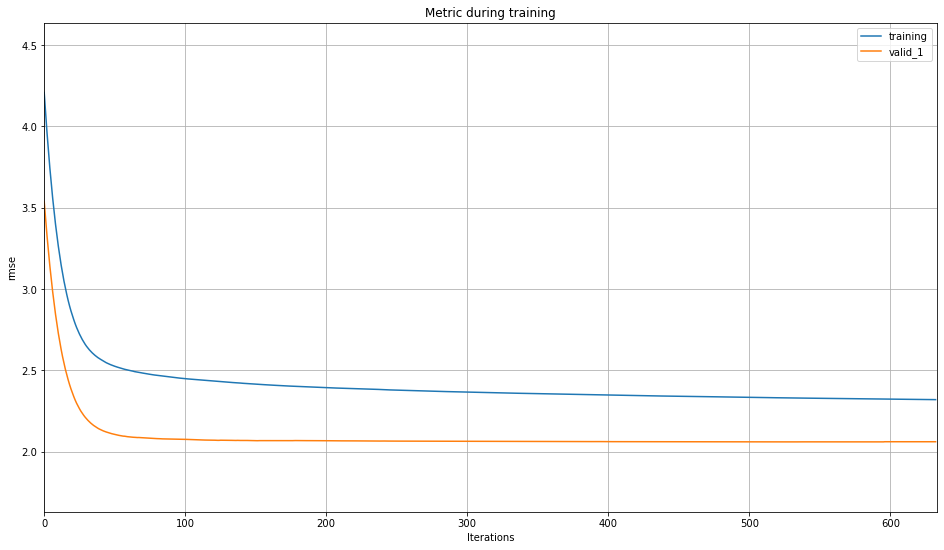

In [18]:
ax = lgb.plot_metric(model, metric="rmse", figsize=(16, 9))

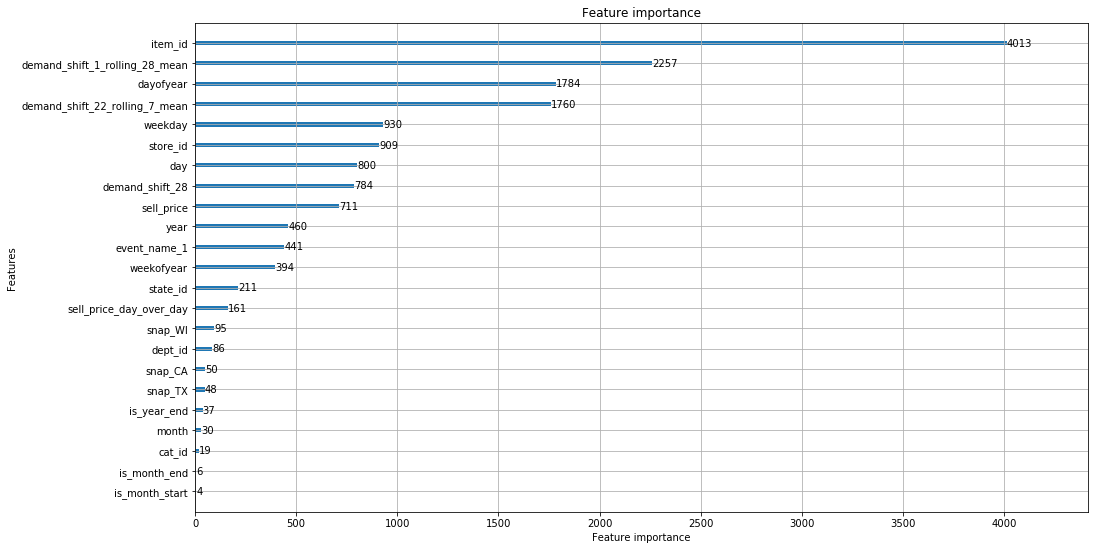

In [19]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [20]:
joblib.dump(model, model_path)

['../models/model.joblib']